<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# **Caso-taller:  Recomendando Música**

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el  tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### **1. Carga de datos**

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos.
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [27]:
!pip install apyori

In [28]:
# Utilice este espacio para escribir el código.
import pandas as pd
from google.colab import files # No es necesario si se ejecuta localmente

# Subir archivos manualmente
uploaded = files.upload() # No es necesario si se ejecuta localmente

# Verifica nombres
print(uploaded.keys())

# Cargar la base de artistas (se usó la opción en google collab)
# ruta_artistas = "data/artists.dat" # Opción para ejecutar localmente.
ruta_artistas = 'artists.dat'
artistas = pd.read_csv(ruta_artistas, sep='\t', header=0, names=['id', 'name', 'url', 'pictureURL'])

# Cargar la base de usuarios y artistas escuchados (se usó la opción en google collab)
# ruta_user_artists = "data/user_artists.dat" # Opción para ejecutar localmente.
ruta_user_artists = 'user_artists.dat'
user_artists = pd.read_csv(ruta_user_artists, sep='\t')

# Renombrar columnas para hacer la unión
artistas = artistas[['id', 'name']]
user_artists = user_artists.rename(columns={'weight': 'nro_reproducciones'})

# Mostrar las primeras filas de ambas bases
print("Artistas:")
print(artistas.head())

print("\nUser Artists:")
print(user_artists.head())

# Asegurarse de que las columnas 'artistID' e 'id' tengan el mismo tipo de datos
user_artists['artistID'] = user_artists['artistID'].astype(str)
artistas['id'] = artistas['id'].astype(str)

# Unir las dos bases de datos por el id del artista (artistID en la base de usuarios)
base_unida = pd.merge(user_artists, artistas, left_on='artistID', right_on='id')

# Mostrar las primeras filas de la base unida
print(base_unida.head())


Saving artists.dat to artists (1).dat
Saving user_artists.dat to user_artists (1).dat
dict_keys(['artists (1).dat', 'user_artists (1).dat'])
Artistas:
   id               name
0   1       MALICE MIZER
1   2    Diary of Dreams
2   3  Carpathian Forest
3   4       Moi dix Mois
4   5        Bella Morte

User Artists:
   userID  artistID  nro_reproducciones
0       2        51               13883
1       2        52               11690
2       2        53               11351
3       2        54               10300
4       2        55                8983
   userID artistID  nro_reproducciones  id           name
0       2       51               13883  51    Duran Duran
1       2       52               11690  52      Morcheeba
2       2       53               11351  53            Air
3       2       54               10300  54   Hooverphonic
4       2       55                8983  55  Kylie Minogue


##### Procedimiento.
Primeramente se utilizaron las librerias de pandas y google.colab import files, estos se usaron para realizar la importación de archivos al cuaderno de python y para realizar el procesamiento de los datos. En caso de querer ejecutar este notebook localmente se debe descomentar la opción en la que se especifica la ruta a la carpeta Data. Posterior a cargar cada una de las bases de datos que son las de artistas y usuarios artistas, se hizo la unión de esta en una sola base datos, con el fin de tener una gran base datos que complementen toda la información disponible, esta unión se realizó por el id de la base artistas y de la base usarios se uso el artistID, pero antes se habia revisado que estos tipo identificadores tengan el mismo tipo de datos para que la unión sea correcta.

##### Análisis
Se observa incialmente que la artira Duran Duran es el artista mas escuchado dentro nuestra base de datos por el usuario numero 2. Asimismo se observa que el usuario #2 dispone de mucho tiempo para reproducir un alto numero de reproduciones de musica, Adicionalmente, se observa que tiene gustos musicales muy variados, pero destaca el trip hop, rock y pop.

### **2. Análisis preliminar.**

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [29]:
#  número de usuarios únicos
n_usuarios = base_unida['userID'].nunique()

#  número de artistas únicos
n_artistas = base_unida['artistID'].nunique()

print(f"Usuarios únicos: {n_usuarios}")
print(f"Artistas únicos: {n_artistas}")

Usuarios únicos: 1892
Artistas únicos: 17632


Existe aproximadamente 9.32 artistas por cada usuario, al sugerir que en promedio, cada usuario tiene una gran variedad de artistas entre los cuales elegir y reproducir su música.


#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

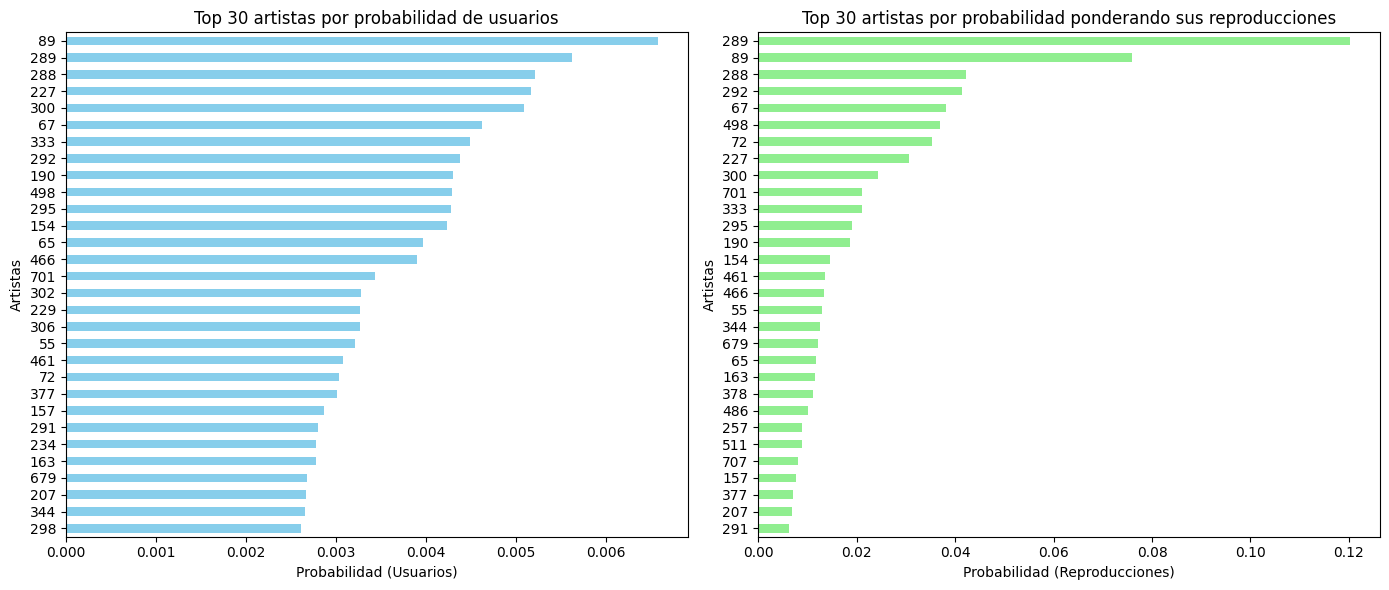

In [30]:
import matplotlib.pyplot as plt

# Distribución sin ponderar: proporción de usuarios por artista
consumo_sin_ponderar = base_unida['artistID'].value_counts(normalize=True)  # ya normaliza = probabilidad

# Distribución ponderada: proporción de reproducciones por artista
#consumo_ponderado = base_unida.groupby('artistID')['nro_reproducciones'].sum()
#consumo_ponderado = consumo_ponderado / consumo_ponderado.sum()  # normalizamos = probabilidad

#total de reproducciones por artista
rep_por_art=base_unida.groupby('artistID')['nro_reproducciones'].sum()
#peso de cada artista en base a su cantidad de reproducciones
pesos=rep_por_art/rep_por_art.sum()
# multiplicamos pesos de reproducciones por la cantidad de usuarios
usuarios_pond=base_unida['artistID'].value_counts()*pesos
# calculamos la probabilidad ponderada por reproducciones
consumo_ponderado=usuarios_pond/usuarios_pond.sum()

# Tomar solo el top 20 artistas
top_usuarios = consumo_sin_ponderar.head(30)
top_reproducciones = consumo_ponderado.sort_values(ascending=False).head(30)

# Graficar distribuciones
plt.figure(figsize=(14, 6))

# Gráfico 1: Distribución de probabilidad sin ponderar
plt.subplot(1, 2, 1)
top_usuarios.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 30 artistas por probabilidad de usuarios')
plt.xlabel('Probabilidad (Usuarios)')
plt.ylabel('Artistas')

# Gráfico 2: Distribución de probabilidad ponderada
plt.subplot(1, 2, 2)
top_reproducciones.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 30 artistas por probabilidad ponderando sus reproducciones')
plt.xlabel('Probabilidad (Reproducciones)')
plt.ylabel('Artistas')

plt.tight_layout()
plt.show()

#### Procedimiento
Primeramente se realiza la distribución sin ponderar, la cual mide la proporción de usuarios por artista donde ya se encuentra normalizada. Posterior, se calcula el total de reproducciones por artista y se pondera o se extrae el peso de cada artista en base a su cantidad de reproducciones. Despues se multiplicamos esos pesos o ponderaciones por la cantidad de usuarios y calculamos la probabilidad ponderada por reproducciones. Seguimos tomando solamneta el top 20 artistas y por ultimos, graficasmos las distribuciones tanto de la probabilidad sin ponderar como la ponderada.

#### Análisis
- Los usuarios escuchan a varios artistas y no solo se concentran en unos pocos.
- La probabilidad de que un usuario elija a un artista específico es relativamente baja y bastante pareja.
- La mayoría de los artistas tienen una proporción muy baja de usuarios, lo que indica que la mayor parte de los usuarios escucha a un conjunto reducido de artistas. Sin embargo, hay algunos artistas que destacan, ya que una mayor proporción de usuarios los escucha. Esto puede sugerir que estos artistas son más populares entre la comunidad de usuarios en general.
- Se observa para el artista #289 que su audiencia es muy fiel e intensiva.
- La comparación de las graficas se observa que hay artistas con gran alcance donde se caracteriza por tener muchos oyentes distintos, aunque con menos repeticiones y otros se destacan por tener mucha intensidad, es decir menos oyentes, pero escuchados con altísima frecuencia de reproducciones.

#### Conclusión
En resumen, mientras que algunos artistas logran captar la atención de muchos usuarios, otros destacan porque son escuchados en exceso por un grupo más reducido. Adicionalmente, el análisis nos muestra que la popularidad puede verse de dos formas: alcance masivo y fidelidad intensa, entediendo como se consume la música.


#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


/tmp/ipython-input-1443878482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_8['proporcion_reproducciones'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()


                     name  nro_reproducciones  proporcion_reproducciones
317             No Angels                6291                   0.173406
318                 Sandy                2396                   0.066044
307        Britney Spears                2258                   0.062240
319        Vanessa Petruo                1735                   0.047824
310               Beyoncé                1425                   0.039279
320             Alexander                1407                   0.038783
311             Sugababes                1039                   0.028639
321           Queensberry                 963                   0.026544
301             Lady Gaga                 921                   0.025387
322          Fady Maalouf                 819                   0.022575
323                  Cher                 800                   0.022051
324  Barbara Schöneberger                 794                   0.021886
309    Christina Aguilera                 783      

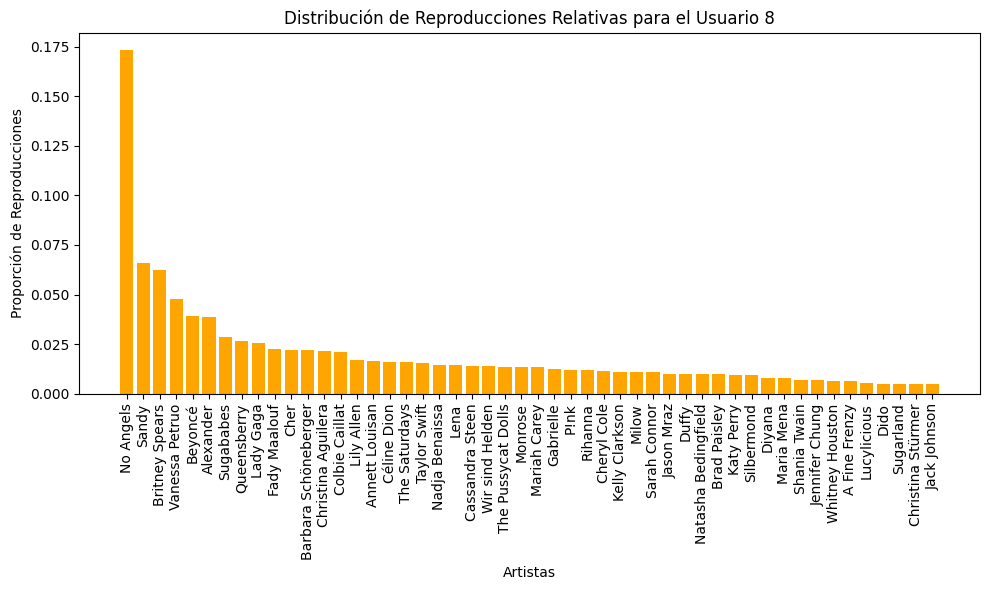

In [31]:
# Utilice este espacio para escribir el código.
# Filtrar los datos del usuario con userID = 8
usuario_8 = base_unida[base_unida['userID'] == 8]

# Calcular la proporción de reproducciones para cada artista escuchado por el usuario 8
usuario_8['proporcion_reproducciones'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()

# Ordenar los artistas por la proporción de reproducciones (mayor a menor)
usuario_8 = usuario_8.sort_values(by='proporcion_reproducciones', ascending=False)


print(usuario_8[['name', 'nro_reproducciones', 'proporcion_reproducciones']])

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.bar(usuario_8['name'], usuario_8['proporcion_reproducciones'], color='orange')
plt.title('Distribución de Reproducciones Relativas para el Usuario 8')
plt.ylabel('Proporción de Reproducciones')
plt.xlabel('Artistas')
plt.xticks(rotation=90)  # Rotar los nombres de los artistas para que sean más legibles
plt.tight_layout()
plt.show()

##### Procedimiento
Primeramente, se realizó un filtro de la base de datos del usuario id igual a 8, posterior se realizo un calculo para extraer la proporción de las reproducciones para cada artista escuchado por el usuario 8. Despues, se ordena los artistas por la proporción de reproducciones de mayor a menor. Al tener todo lo anterior se realiza el grafico de distrubución.

##### Análisis
Los primeros 5 artistas ("No Angels", "Sandy", "Britney Spears", "Vanessa Petruo" y "Beyonce") concentran una proporción significativa de las reproducciones. Al sugerir, que el usuario tiene preferencias bastante marcadas y tiende a escuchar repetidamente a sus artistas favoritos.

Aunque hay una concentración en las reproducciones, el usuario #8 tiende a escuchar a varios artistas en una menor frecuencia. Es decir, hay otros artistas pero no los escucha frecuentemente.

No Angeles es el artista mas reproducido por este usuario, con aproximadamente el 17% de sus reproduciones totales. Esto dice que este su artista favorito y esta presente en casi todos los dias de su vida.

##### Conclusión
El usuario #8 reproduce mucho musica de genero de pop femenino y los girl groups, con presencia notable de actos alemanes/europeos, Asimismo, combina estos  con estrellas globales del pop. Sin embargo, No Angels concentra aproximadamente ≈17% de todas las reproducciones, casi el triple del siguiente artista. Además, el hecho de que Sandy y Vanessa Petruo —integrantes del mismo universo No Angels— aparezcan en el top 5 sugiere fidelidad fuerte a esos artista a pesar de los cambios. Al sumar alrededor el 29% del total.

### **3. Generando Recomendaciones**

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [32]:
base_unida

,userID,artistID,nro_reproducciones,id,name
0,2,51,13883,51,Duran Duran
1,2,52,11690,52,Morcheeba
2,2,53,11351,53,Air
3,2,54,10300,54,Hooverphonic
4,2,55,8983,55,Kylie Minogue
...,...,...,...,...,...
92829,2100,18726,337,18726,Nyktalgia
92830,2100,18727,297,18727,Atsakau niekadA
92831,2100,18728,281,18728,Domantas Razauskas
92832,2100,18729,280,18729,Atalyja


In [33]:
#Tenemos que calcular #usuarios que han escuchado cada artista
popularidad_simple = base_unida.groupby('artistID')['userID'].nunique().reset_index()
popularidad_simple.columns = ['artistID', 'n_usuarios']

#Tenemos que btener la lista de artistas que el usuario 8 ya escuchó
artistas_escuchados_u8 = base_unida[base_unida['userID'] == 8]['artistID'].unique()

#Tenemos que filtrar los artistas que el usuario 8 NO ha escuchado
no_escuchados = popularidad_simple[~popularidad_simple['artistID'].isin(artistas_escuchados_u8)]

#Tenemos que ordenar por #usuarios que los han escuchado y mostrarle el top 10 de recomendaciones para el
recomendaciones = no_escuchados.sort_values(by='n_usuarios', ascending=False).head(10)
nombres_artistas = base_unida[['artistID', 'name']].drop_duplicates(subset='artistID')

# Unimos nombre a las recomendaciones
recomendaciones = recomendaciones.merge(nombres_artistas, on='artistID', how='left')

print("Recomendaciones para el usuario 8 basadas en popularidad simple:")
print(recomendaciones)


Recomendaciones para el usuario 8 basadas en popularidad simple:
  artistID  n_usuarios           name
0      227         480    The Beatles
1       67         429        Madonna
2      333         417  Avril Lavigne
3      190         400           Muse
4      498         399       Paramore
5      154         393      Radiohead
6       65         369       Coldplay
7      466         362          Ke$ha
8      701         319        Shakira
9      229         304    The Killers


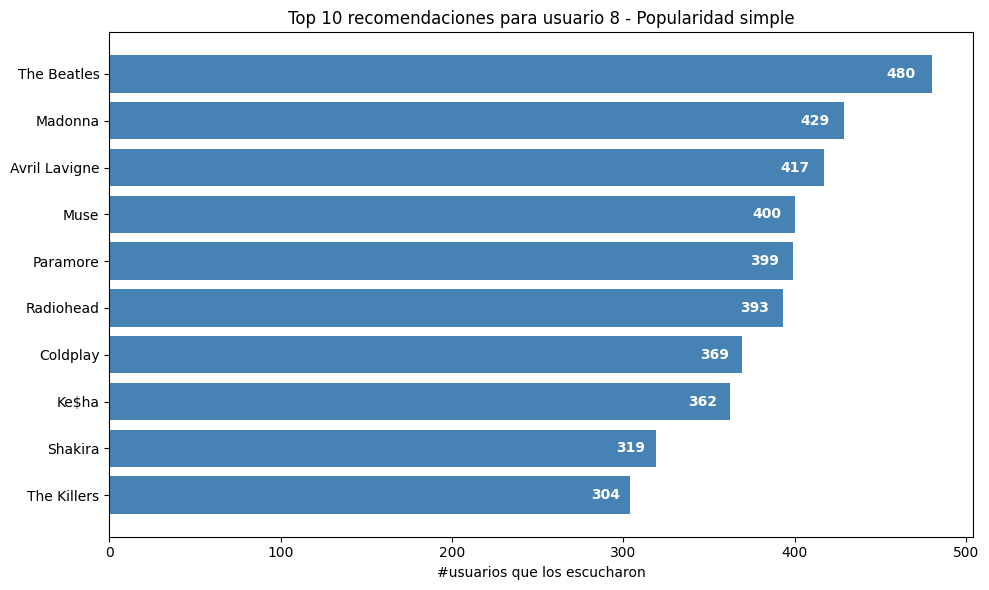

In [34]:
plt.figure(figsize=(10, 6))
bars = plt.barh(recomendaciones['name'][::-1], recomendaciones['n_usuarios'][::-1], color='steelblue')
plt.xlabel('#usuarios que los escucharon')
plt.title('Top 10 recomendaciones para usuario 8 - Popularidad simple')

for bar in bars:
    width = bar.get_width()
    label_text = f'{int(width):,}'
    plt.text(width * 0.98,
             bar.get_y() + bar.get_height() / 2,
             label_text,
             va='center',
             ha='right',
             color='white',
             fontweight='bold')

plt.tight_layout()
plt.show()

#### Procedimiento
Para hacerle recomendaciones al usuario 8, usamos un método simple: miramos cuáles son los artistas más populares, es decir, los que más usuarios han escuchado. Luego quitamos los que él ya escuchó y le recomendamos los 10 más populares que aún no conoce

#### Analisis
Este método es útil porque le sugiere artistas que mucha gente escucha, así que es probable que le gusten. Pero no es muy personalizado, ya que no toma en cuenta sus gustos específicos ni cuántas veces escucha a cada artista. Aun así, es una buena forma de empezar a recomendarle cosas nuevas

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Utilice un promedio ponderado para generar las recomendaciones. Considere el número de veces que los usuarios reproducen al artista. En otras palabras, genere un ponderador que use el número de veces que el artista fue reproducido (`nro_reproducciones`). Este método pondera la popularidad de un artista, combinando el número de usuarios que lo escuchan con la frecuencia de reproducción, de manera que los artistas con más reproducciones reciban una mayor ponderación.

Genere una tabla y/o gráfica con las 10 principales recomendaciones de artistas para este usuario. Explique detalladamente su procedimiento y justifique sus elecciones. Compare estas recomendaciones con las del sistema implementado en el paso anterior.

In [35]:
#Tenemos que calcular para cada artista: total de usuarios únicos y total de reproducciones
popularidad_ponderada = base_unida.groupby('artistID').agg({
    'userID': 'nunique',
    'nro_reproducciones': 'sum'
}).reset_index()
popularidad_ponderada.columns = ['artistID', 'n_usuarios', 'total_reproducciones']

#Tenemos que crear un puntaje ponderado: puedes usar simplemente el producto
popularidad_ponderada['puntaje'] = popularidad_ponderada['n_usuarios'] * popularidad_ponderada['total_reproducciones']

#Tenemos que obtener los artistas que el usuario 8 ya escuchó
artistas_escuchados_u8 = base_unida[base_unida['userID'] == 8]['artistID'].unique()

#Tenemos que filtrar los artistas que el usuario 8 NO ha escuchado
no_escuchados = popularidad_ponderada[~popularidad_ponderada['artistID'].isin(artistas_escuchados_u8)]

#Tenemos que ordenar por el puntaje ponderado y sacar el top 10
recomendaciones_ponderadas = no_escuchados.sort_values(by='puntaje', ascending=False).head(10)

#Tenemos que agregar los nombres desde base_unida
nombres_artistas = base_unida[['artistID', 'name']].drop_duplicates(subset='artistID')
recomendaciones_ponderadas = recomendaciones_ponderadas.merge(nombres_artistas, on='artistID', how='left')

#Orden final de columnas
recomendaciones_ponderadas = recomendaciones_ponderadas[['artistID', 'name', 'n_usuarios', 'total_reproducciones', 'puntaje']]
print("Recomendaciones ponderadas para el usuario 8 - popularidad con reproducciones")
print(recomendaciones_ponderadas)


Recomendaciones ponderadas para el usuario 8 - popularidad con reproducciones
  artistID           name  n_usuarios  total_reproducciones    puntaje
0       67        Madonna         429                921198  395193942
1      498       Paramore         399                963449  384416151
2       72   Depeche Mode         282               1301308  366968856
3      227    The Beatles         480                662116  317815680
4      701        Shakira         319                688529  219640751
5      333  Avril Lavigne         417                525844  219276948
6      190           Muse         400                485076  194030400
7      154      Radiohead         393                385306  151425258
8      461    Miley Cyrus         286                489065  139872590
9      466          Ke$ha         362                384405  139154610


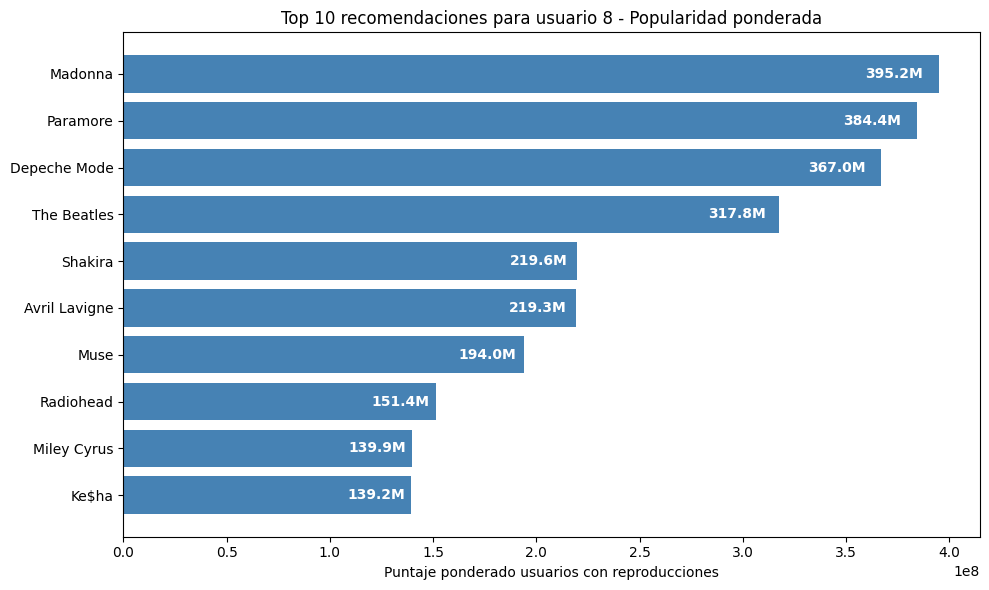

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.barh(recomendaciones_ponderadas['name'][::-1], recomendaciones_ponderadas['puntaje'][::-1], color='steelblue')
plt.xlabel('Puntaje ponderado usuarios con reproducciones')
plt.title('Top 10 recomendaciones para usuario 8 - Popularidad ponderada')

for bar in bars:
    width = bar.get_width()
    label_text = f'{width/1_000_000:.1f}M'
    plt.text(width * 0.98,
             bar.get_y() + bar.get_height() / 2,
             label_text,
             va='center',
             ha='right',
             color='white',
             fontweight='bold')
plt.tight_layout()
plt.show()

#### Procedimiento
Para hacer estas recomendaciones, combinamos dos cosas: cuántos usuarios han escuchado a cada artista y cuántas veces lo hicieron. Multiplicamos estos valores para obtener un puntaje que refleja tanto la popularidad como la intensidad de escucha. Luego quitamos los artistas que el usuario 8 ya conoce y nos quedamos con los 10 mejores puntajes

#### Analisis
Este método no solo sugiere artistas que son conocidos por mucha gente, sino también aquellos que se escuchan mucho. Así se destacan artistas como Madonna o Paramore, que no solo tienen muchos oyentes, sino que además son reproducidos con frecuencia, lo que indica que gustan bastante

#### Conclusiones
Esta forma de recomendar es más precisa que solo contar usuarios, ya que también mide qué tan escuchado es un artista. Por eso, las sugerencias finales tienden a ser más relevantes y ajustadas a los gustos generales de la comunidad


#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [37]:

#Creamos un df con el valor de las reproducciones de cada usuario para cada artista
matriz_reprod=base_unida.pivot_table(values='nro_reproducciones',index='userID',columns='artistID')

matriz_reprod


artistID,1,10,100,1000,10000,10001,10002,10003,10004,10005,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,1315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

matriz_reprod_dummy=matriz_reprod.copy().fillna(0)

#Calculamos la similitud del coseno entre los usarios en base a sus reproducciones para cada artista
cosine_sim = cosine_similarity(matriz_reprod_dummy, matriz_reprod_dummy)

#Creamos un df con los valores
cosine_sim = pd.DataFrame(cosine_sim, index=matriz_reprod_dummy.index, columns=matriz_reprod_dummy.index)

cosine_sim.head(10)

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,0.0,0.144786,0.028692,0.007016,0.030219,0.008964,0.0,0.000000,0.021267,...,0.000000,0.043405,0.000000,0.004625,0.001585,0.0,0.000956,0.082134,0.000000,0.0
3,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000318,0.0
4,0.144786,0.0,1.000000,0.081193,0.006609,0.000000,0.000000,0.0,0.009072,0.013407,...,0.000000,0.000000,0.003776,0.006178,0.000000,0.0,0.045125,0.659085,0.000000,0.0
5,0.028692,0.0,0.081193,1.000000,0.000000,0.000000,0.000000,0.0,0.169078,0.004639,...,0.010993,0.000000,0.205141,0.000000,0.000000,0.0,0.204557,0.119133,0.000000,0.0
6,0.007016,0.0,0.006609,0.000000,1.000000,0.012713,0.018881,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,0.030219,0.0,0.000000,0.000000,0.012713,1.000000,0.167416,0.0,0.000000,0.247062,...,0.000000,0.001678,0.000000,0.000000,0.017636,0.0,0.000000,0.000000,0.000000,0.0
8,0.008964,0.0,0.000000,0.000000,0.018881,0.167416,1.000000,0.0,0.000000,0.187304,...,0.000000,0.000000,0.000000,0.000000,0.034826,0.0,0.000000,0.000000,0.000000,0.0
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.048289,0.000000,0.000000,0.000000,0.022935,0.0,0.000000,0.000000,0.005969,0.0
10,0.000000,0.0,0.009072,0.169078,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.008895,0.000000,0.109260,0.000000,0.000000,0.0,0.057869,0.110738,0.000000,0.0


In [39]:
import numpy as np

#Creamos una base para las recomendaciones con el id y nombre de cada artista
recomendaciones_coseno=nombres_artistas.copy()

#Utilizamos la similitud del coseno del usario 8 frente a los demas usuarios.
sim_usr8=cosine_sim[8]

l=[]

for artist_id in recomendaciones_coseno['artistID']:

  #Obtenemos las reproducciones por usario de cada artista
  reps=matriz_reprod[artist_id]

  #Consideramos solo a los usuarios que han reproducido al artista
  idx = reps[reps.isnull()].index
  sim_usr8_clean = sim_usr8.drop(idx)
  reps = reps.dropna()

  #Evitamos divisiones por 0 considerando un valor de 0 para estas observaciones.
  if sim_usr8_clean.sum()==0:
    l.append(0)

  #Calculamos y agregamos el promedio ponderado a la lista.
  else:
    pond_cos=np.dot(sim_usr8_clean, reps)/ sim_usr8_clean.sum()
    l.append(pond_cos)

#Agregamos los promedios ponderados de cada artista al dataframe.
recomendaciones_coseno['Reproducciones']=l

In [40]:
#Agregamos a la base la cantidad de usuarios que escucha a cada artista
usrs_por_artista=base_unida.groupby('artistID')['userID'].nunique()

recomendaciones_coseno=pd.merge(usrs_por_artista,recomendaciones_coseno,left_index=True,right_on='artistID')

recomendaciones_coseno.rename(columns={'userID':'Usuarios'},inplace=True)

#Ordenamos en base al promedio ponderado de reproducciones.
recomendaciones_coseno=recomendaciones_coseno.sort_values(by='Reproducciones', ascending=False)

recomendaciones_coseno

,Usuarios,artistID,name,Reproducciones
26929,2,8308,Johnny Hallyday,32990.000000
17833,1,6373,Tyler Adam,30614.000000
88419,1,18121,Rytmus,23462.000000
2434,43,1541,The Devil Wears Prada,17097.666227
1654,28,1191,Hadouken!,13330.754741
...,...,...,...,...
69,3,120,Deru,0.000000
47284,3,12000,The Field,0.000000
30351,1,4091,Shikari,0.000000
22398,14,4092,Dinosaur Jr.,0.000000


In [41]:
#Filtramos la base solo con los artistas con usarios superiores al percentil 98
recomendaciones_coseno_filt=recomendaciones_coseno[recomendaciones_coseno['Usuarios']>=recomendaciones_coseno['Usuarios'].quantile(.98)]

#Tenemos que filtrar los artistas que el usuario 8 NO ha escuchado
no_escuchados_coseno = recomendaciones_coseno_filt[~recomendaciones_coseno_filt['artistID'].isin(artistas_escuchados_u8)]

#Tenemos que ordenar por el puntaje ponderado y sacar el top 10
recomendaciones_coseno_top = no_escuchados_coseno.sort_values(by='Reproducciones',ascending=False).head(10)

#Presentamos resultados
print("Recomendaciones para usuario 8 - Reproducciones promedio ponderadas con similitud del coseno")
print(recomendaciones_coseno_top)


Recomendaciones para usuario 8 - Reproducciones promedio ponderadas con similitud del coseno
      Usuarios artistID             name  Reproducciones
1523        52     1119    Faith No More     3554.686426
16         429       67          Madonna     2129.528729
21         282       72     Depeche Mode     2105.188351
144         68      188            Opeth     2055.993782
1436        66     1075             IAMX     1898.458068
0          111       51      Duran Duran     1889.480625
129        242      173          Placebo     1772.188920
1643        69     1180  Escape The Fate     1714.391661
531         73      504              HIM     1633.252218
4          298       55    Kylie Minogue     1536.414521


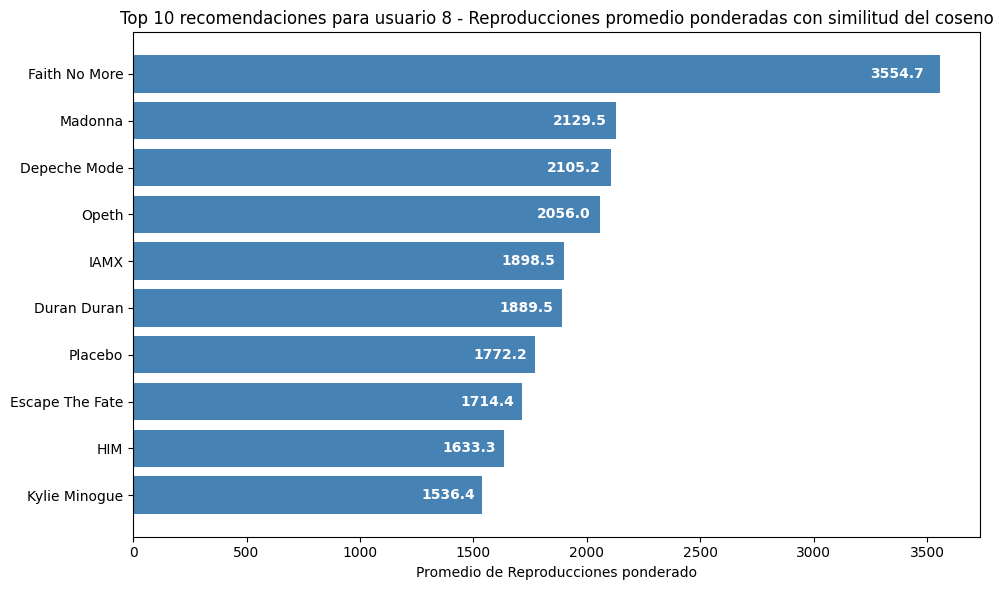

In [42]:
plt.figure(figsize=(10, 6))
bars = plt.barh(recomendaciones_coseno_top['name'][::-1], recomendaciones_coseno_top['Reproducciones'][::-1], color='steelblue')
plt.xlabel('Promedio de Reproducciones ponderado')
plt.title('Top 10 recomendaciones para usuario 8 - Reproducciones promedio ponderadas con similitud del coseno')

for bar in bars:
    width = bar.get_width()
    label_text = f'{width:.1f}'
    plt.text(width * 0.98,
             bar.get_y() + bar.get_height() / 2,
             label_text,
             va='center',
             ha='right',
             color='white',
             fontweight='bold')
plt.tight_layout()
plt.show()

#### Procedimiento
1.   Se creo una matriz usuario-artista con la cantidad de reproduciones como valores.
2.   Calculamos la similitud del coseno entre los usarios en base a sus reproducciones para cada artista.
3.   Considerando la similitud del coseno del usario 8 frente a los demás usuarios, se calculo el promedio ponderado de visualizaciones para cada artista de la base usando como pesos los valores de similitud de cada usuario.
4.   Se filtran los resultados para mantener solo a los artistas con una audiencia significativa de tal forma que un valor pequeño de usuarios no afecte el resultado del promedio ponderado.
5.   Seleccionamos los 10 artistas con mayor promedio ponderado de visualizaciones.

#### Analisis
Este método destaca a los artistas con un elevado número de reproducciones por parte de los usuarios más similares al usuario número 8. Sin embargo, aún considerando solo el 2% de los artistas con más usuarios, identificamos que artistas con números muy bajos de usuarios forman parte de las recomendaciones. Es posible que esto sea resultado de que estos artistas cuenten con una sola observación con muchas reproducciones y un puntaje de similitud bastante elevado frente al resto. Entre estos artistas encotramos géneros de de metal o rock, que no están muy vinculados a los gustos del usuario.


#### Comparaciones
A diferencia de los métodos utilizados previamente, la ponderación con similitud del coseno ofrece la ventaja de considerar los patrones de consumo del usuario y como estos se relacionan con las demás observaciones de la base para de esta forma ofrecer recomendaciones personalizadas. En este caso, observamos que los artistas recomendados con similitud del coseno son muy distintos a los previos, solo coinciden Madonna y Depeche Mode.


#### Conclusiones
La principal ventaja de la ponderación por coseno es que obtenemos resultados únicos para cada usuario. No obstante, los resultados obtenidos muestran algunas limitaciones. Por lo tanto, aunque la técnica ofrece una personalización valiosa, es fundamental combinarla con mecanismos de filtrado adicionales que mitiguen sesgos y aseguren una mayor coherencia con los gustos reales del usuario.

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


Recomendaciones para el usuario 8 basadas en SVD:
     artistID              name  Predictions
366       466             Ke$ha   290.565513
4          55     Kylie Minogue   265.189724
107       161  Enrique Iglesias   200.743333
233       294       Leona Lewis   186.200441
240       306   Black Eyed Peas   122.385493
103       157   Michael Jackson   116.655896
1369     1459  Carrie Underwood   103.512645
811       913   Destiny's Child    98.511190
247       314             Ciara    97.729237
235       299    Jennifer Lopez    95.900912


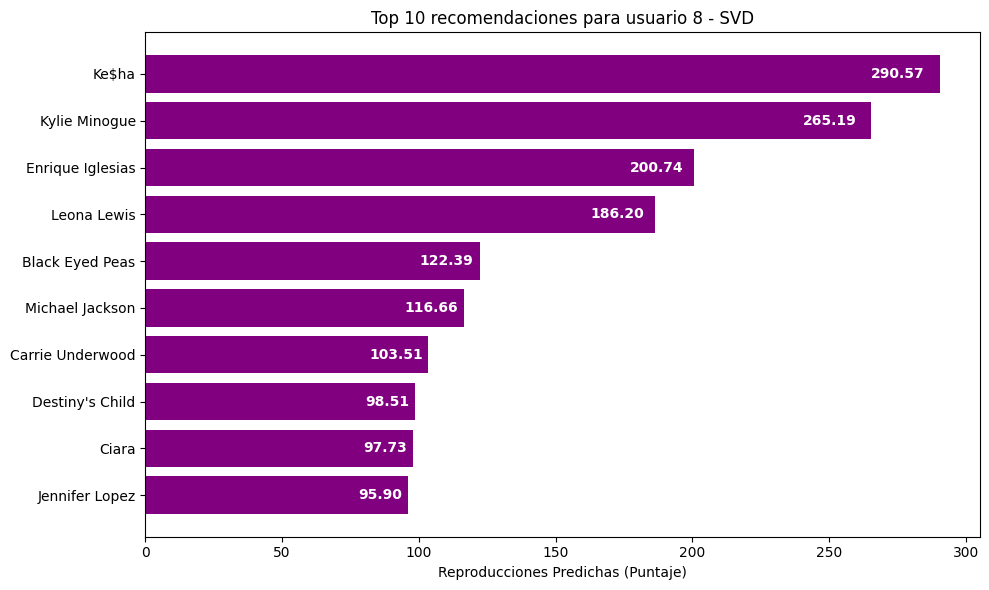

In [43]:
# Crear matriz de usuario-artista con el número de reproducciones na x 0
matriz_reprod = base_unida.pivot_table(values='nro_reproducciones', index='userID', columns='artistID').fillna(0)

#Descomponer matriz
A = matriz_reprod.to_numpy()
#  transformarlas a una matriz y centrar en cero utilizando la media de los ratings de cada usuario para aplicar SVD.
user_ratings_mean = np.mean(A, axis=1)
A_demeaned = A - user_ratings_mean.reshape(-1, 1)

# Importar la función SVD de SciPy
from scipy.sparse.linalg import svds
# Aplicar SVD. Usaremos k=50 factores
U, sigma, Vt = svds(A_demeaned, k=50)
# Reconstruir la matriz diagonal de valores singulares
sigma = np.diag(sigma)

#Reconstruir la matriz de predicciones y agregar pormedio usuarios
A_recomendaciones = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
recomendac_df = pd.DataFrame(A_recomendaciones, columns=matriz_reprod.columns, index=matriz_reprod.index)

#Función para recomendar artistas
def recomendador_svd(predictions_df, user_id, artistas_df, base_original, num_recommendations=10):
    # Obtener la fila del usuario y ordenar sus predicciones de mayor a menor
    sorted_user_predictions = predictions_df.loc[user_id].sort_values(ascending=False)

    # Obtener los artistas que el usuario ya ha escuchado para no volver a recomendarlos
    user_data = base_original[base_original['userID'] == user_id]
    artistas_escuchados = user_data['artistID'].unique()

    # Filtrar artistas que el usuario no ha escuchado y unirlos con sus predicciones
    recomendaciones = artistas_df[~artistas_df['artistID'].isin(artistas_escuchados)]
    recomendaciones = recomendaciones.merge(pd.DataFrame(sorted_user_predictions).reset_index(), how='left',
                                           left_on='artistID',
                                           right_on='artistID')
    # Renombrar la columna de predicciones y obtener las 10 mejores
    recomendaciones = recomendaciones.rename(columns={user_id: 'Predictions'}).sort_values('Predictions', ascending=False).iloc[:num_recommendations, :]

    return recomendaciones

# 5. Generar y mostrar las 10 recomendaciones para el usuario 8
nombres_artistas = base_unida[['artistID', 'name']].drop_duplicates()
recomendaciones_svd = recomendador_svd(recomendac_df, 8, nombres_artistas, base_unida, 10)

print("Recomendaciones para el usuario 8 basadas en SVD:")
print(recomendaciones_svd[['artistID', 'name', 'Predictions']])

# 6. Graficar las recomendaciones
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(recomendaciones_svd['name'][::-1], recomendaciones_svd['Predictions'][::-1], color='purple')
plt.xlabel('Reproducciones Predichas (Puntaje)')
plt.title('Top 10 recomendaciones para usuario 8 - SVD')

for bar in bars:
    width = bar.get_width()
    label_text = f'{width:.2f}'
    plt.text(width * 0.98, bar.get_y() + bar.get_height() / 2, label_text,
             va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

#### Procedimiento
1.   Se creo una matriz usuario-artista y los valores faltantes se rellenaron con cero.
2.   Normalización de Datos: Se normalizó la matriz restando el promedio de reproducciones de cada usuario. Esto es crucial porque elimina el sesgo de usuarios que tienden a reproducir más música en general, permitiendo que el modelo se enfoque en las preferencias relativas.
3. Aplicación de SVD: Se aplicó SVD a la matriz normalizada para descomponerla y capturar 50 factores latentes (k=50).
4. Reconstrucción y Predicción: Se multiplicaron las tres matrices resultantes de SVD para reconstruir la matriz original, se sumó de nuevo el promedio de reproducciones de cada usuario para obtener el puntaje final.
5. Generación de Recomendaciones: Se seleccionaron los 10 artistas con el puntaje de reproducción predicho más alto que el usuario 8 aún no ha escuchado.

#### Analisis
El método de Descomposición en Valores Singulares (SVD) es una técnica de factorización de matrices que permite reducir la dimensionalidad de los datos, descubriendo características.

Al observar esta lista, notamos inmediatamente que las recomendaciones son muy coherentes con el perfil del usuario 8, que muestra una fuerte preferencia por Pop femenino. A diferencia de los métodos de popularidad, que recomendaban artistas muy famosos pero de géneros variados, SVD ha logrado una personalización mucho más fina.

#### Comparaciones
Las recomendaciones de SVD son claramente superiores en términos de personalización y relevancia. El modelo fue capaz de ir más allá de la popularidad superficial y entender por qué al usuario 8 le gustan ciertos artistas
* SVD (Mejor): Más coherente y relevante.
* Similitud de Coseno: Personalizado pero con algunas recomendaciones inesperadas.
* Promedios Ponderados: Ligeramente mejor que el simple, pero aún muy genérico.
* Promedios Simples: El menos personalizado

#### Conclusiones
SVD captura mejor las preferencias: Mientras que los métodos de popularidad son buenos para usuarios con gustos muy generales, SVD demuestra ser mucho más efectivo para usuarios con preferencias específicas, como el usuario 8.

El uso de SVD se justifica porque, al reducir la dimensionalidad de la matriz usuario-artista, el modelo aprende una representación compacta de los gustos de los usuarios y las características de los artistas.

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


Recomendaciones para el usuario 8 basadas en Apriori:
  artistID                name   Support  Confidence       Lift
0      296           Sugababes  0.015856    0.500000  11.679012
1      352         Cheryl Cole  0.018499    0.583333   8.622396
2      294         Leona Lewis  0.025899    0.604938   7.153395
3      291      Kelly Clarkson  0.034884    0.814815   5.929345
4      257        Mariah Carey  0.020085    0.745098   5.849483
5      299      Jennifer Lopez  0.067653    0.549356   4.973119
6      349  The Pussycat Dolls  0.025899    0.604938   4.912203
7      157     Michael Jackson  0.017970    0.666667   4.741855
8      344        Taylor Swift  0.022199    0.608696   4.662559
9      461         Miley Cyrus  0.085095    0.651822   4.312052


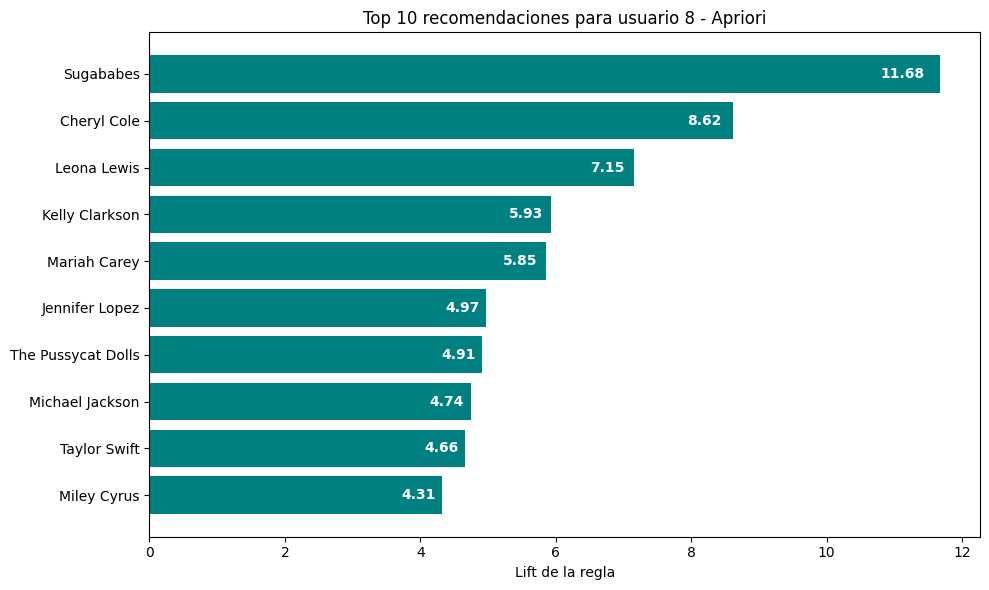

In [44]:
from apyori import apriori

# 1) Crear lista de transacciones (cada usuario = lista de artistas escuchados)
records = []
for i in base_unida['userID'].unique():
    records.append(list(base_unida[base_unida['userID'] == i]['artistID'].values))

# 2) Ejecutar Apriori
association_rules = apriori(records,
                            min_support=0.01,
                            min_confidence=0.5,
                            min_lift=2,
                            max_length=2)
association_results = list(association_rules)

# 3) Procesar reglas en DataFrame
rules_list = []
for rule in association_results:
    for ordered_stat in rule.ordered_statistics:
        antecedente = set(ordered_stat.items_base)
        consecuente = set(ordered_stat.items_add)
        if antecedente and consecuente:
            rules_list.append({
                "antecedente": list(antecedente)[0],
                "consecuente": list(consecuente)[0],
                "soporte": rule.support,
                "confianza": ordered_stat.confidence,
                "lift": ordered_stat.lift
            })

df_rules = pd.DataFrame(rules_list)

# 4) Filtrar reglas que apliquen al usuario 8 (artistas que ya escuchó)
artistas_usuario8 = set(base_unida[base_unida['userID'] == 8]['artistID'])
recomendaciones = df_rules[df_rules['antecedente'].isin(artistas_usuario8)]

# 5) Ordenar por lift y quedarnos con la mejor regla por artista
top10 = (
    recomendaciones.sort_values(by="lift", ascending=False)
    .drop_duplicates(subset=["consecuente"])   # evitar artistas repetidos
    .head(10)
)

# 6) Mapear artistID a nombres
nombres_artistas = base_unida[['artistID', 'name']].drop_duplicates()
top10 = top10.merge(nombres_artistas, left_on="consecuente", right_on="artistID")

# 7) Crear tabla con resultados
tabla_recomendaciones = top10[['artistID', 'name', 'soporte', 'confianza', 'lift']]
tabla_recomendaciones = tabla_recomendaciones.rename(columns={
    "soporte": "Support",
    "confianza": "Confidence",
    "lift": "Lift"
})

print("Recomendaciones para el usuario 8 basadas en Apriori:")
print(tabla_recomendaciones)

# 8) Graficar
plt.figure(figsize=(10, 6))
bars = plt.barh(top10['name'][::-1], top10['lift'][::-1], color='teal')
plt.xlabel('Lift de la regla')
plt.title('Top 10 recomendaciones para usuario 8 - Apriori')

# Etiquetas en las barras
for bar in bars:
    width = bar.get_width()
    label_text = f'{width:.2f}'
    plt.text(width * 0.98, bar.get_y() + bar.get_height() / 2, label_text,
             va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


**Procedimiento.**

El código anterior genera 10 recomendaciones de artistas para el usuario 8 usando Apriori (solo reglas de 2 elementos: A → B). El paso a paso del procedimiento anteriormente realizado fue:

* Preprocesamiento: se construye records el cual es una lista de transacciones donde cada transacción es la lista de artistID escuchados por cada usuario.
* Implementación apyori.apriori: se ejecuta con los hiperparámetros especificados que se justifican abajo.
* Extracción y normalización de reglas: se convierte la salida (lista de reglas) a DataFrame con columnas antecedente, consecuente, soporte, confianza, lift. Luego se filtran las reglas para quedarse con aquellas cuyo antecedente pertenece a los artistas que el usuario 8 ya escuchó. Por último se ordena por lift (filtro y ranking final), se descartan duplicados por consecuente se queda con la mejor regla para cada artista y se toma el top 10.
* Salida: al final se muestra una tabla resumen con artistID, name, Support, Confidence, Lift y una gráfica horizontal del Top-10 (ordenada por lift) mostrando la fuerza de asociación por barra y la etiqueta numérica con 2 decimales.

**Justificación de hiperparámetros.**
* min_support = 0.01. Se eligió 0.01 como un umbral razonable para no perder ítems que aparecen en ~1% o más de los usuarios. En la tabla final se observan soportes del 1.6% al 8.5%, por lo que ese umbral permitió que estos artistas aparecieran en los itemsets frecuentes. Esto se justifica porque si el soporte es demasiado alto se pierden asociaciones relevantes para ítems menos populares; si es demasiado bajo, el algoritmo genera muchas reglas espurias y aumenta el coste computacional.
* min_confidence = 0.5. Se exige que al menos en la mitad de las transacciones donde aparece el antecedente también aparezca el consecuente. Esto da recomendaciones relativamente confiables (probabilidad condicional razonable).
* min_lift = 2. Para priorizar asociaciones que ocurren al menos el doble de lo esperado por azar (lift > 2). Esto reduce reglas que se deben únicamente a la popularidad de un artista y resalta asociaciones fuertes.
* max_length = 2. Consiste en el pedido explícito: “genere solo reglas con 2 elementos”. También simplifica la interpretación: regla A → B.

Estos valores son trade-offs entre cobertura (mostrar suficientes reglas) y precisión/interpretabilidad.

**Resultados**

La tabla muestra las 10 recomendaciones obtenidas con el algoritmo Apriori para el usuario 8, incluyendo artistas como Sugababes, Cheryl Cole, Leona Lewis y Kelly Clarkson. Los indicadores de soporte, confianza y lift permiten interpretar la relevancia de cada recomendación: algunos artistas, aunque con un soporte relativamente bajo en la base de usuarios, presentan lifts muy altos, lo que significa que escuchar al antecedente multiplica notablemente la probabilidad de escuchar al consecuente. Así, la tabla combina artistas de popularidad moderada con asociaciones estadísticamente muy fuertes, ofreciendo un balance entre descubrimiento de nuevas opciones y reconocimiento de patrones consolidados.

La gráfica representa de forma visual el top-10 de recomendaciones ordenadas por el valor de lift. Cada barra refleja la fuerza de la asociación entre el antecedente y el consecuente, destacando visualmente a los artistas con mayor lift, como Sugababes y Cheryl Cole, respecto a otros con lift moderado pero soporte más amplio, como Miley Cyrus. Esto permite identificar de un vistazo qué recomendaciones se sostienen por asociaciones poco frecuentes pero muy significativas, y cuáles por artistas de mayor alcance pero con una fuerza de relación relativamente menor.

**Comparación Apriori vs. SVD**

Ventajas de Apriori
* Basado en reglas de asociación: fácil de interpretar (antecedente → consecuente).
* Explica por qué se recomienda un artista (ejemplo: quienes escuchan A también suelen escuchar B).
* Útil para identificar patrones colectivos de comportamiento.
* No requiere información adicional como valoraciones o ratings, solo el historial de reproducción.

Desventajas de Apriori
* Puede generar reglas poco relevantes si los parámetros no se ajustan bien (soporte, confianza, lift).
* Escalabilidad limitada: el cálculo se vuelve costoso con bases de datos muy grandes.
* Depende de la co-ocurrencia, por lo que no captura similitudes “latentes” entre artistas.

Ventajas de SVD (Descomposición en valores singulares)
* Permite reducir la dimensionalidad de la matriz usuario–artista, capturando patrones latentes en el comportamiento.
* Detecta relaciones implícitas entre usuarios y artistas, incluso si no han co-ocurrido directamente.
* Escalable y eficiente al trabajar en espacios reducidos, lo que agiliza el cálculo de recomendaciones.
* Ofrece predicciones personalizadas (puntajes de afinidad) más allá de simples asociaciones.
* Tiende a ser más preciso en contextos con datos dispersos, ya que aprovecha estructuras ocultas en la matriz.

Desventajas de SVD
* Menos interpretable: los factores latentes no tienen un significado claro, lo que dificulta justificar por qué se recomienda un artista.
* Requiere suficiente cantidad de datos observados para que las descomposiciones sean estables (problema del cold start en usuarios o ítems nuevos).
* El cálculo de la descomposición completa puede ser costoso computacionalmente en matrices muy grandes, aunque existen optimizaciones y versiones truncadas.
* Necesita ajuste fino (ej. número de componentes) para balancear entre precisión y sobreajuste.

Interpretación de resultados
* Apriori: las recomendaciones para el usuario 8 se basan en reglas claras de asociación (ejemplo: si escucha X, entonces hay alta probabilidad de que escuche Y). El énfasis está en la fuerza estadística de la asociación medida con soporte, confianza y lift, lo que hace al modelo más interpretable.
* SVD (descomposición en valores singulares): las recomendaciones se construyen a partir de factores latentes que capturan patrones complejos en las preferencias musicales. El énfasis está en los puntajes de predicción generados por la descomposición de la matriz usuario–artista, sin que exista una explicación directa de la relación entre artistas.

### **4. Recomendaciones generales**

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

**¿Qué procedimiento generó las mejores recomendaciones?**

* SVD (descomposición en valores singulares) parece haber generado las recomendaciones más personalizadas, ya que su modelo captura patrones latentes en las interacciones usuario–artista y ofrece resultados menos sesgados por la simple popularidad. Esto se refleja en que aparecen artistas relacionados con los gustos específicos del usuario, incluso si no son los más escuchados globalmente.

* Apriori aporta reglas interesantes y relaciones explícitas entre artistas, pero tiende a ser más limitado porque depende de co-ocurrencias directas. Sus recomendaciones son útiles como complemento, pero menos flexibles frente a usuarios con gustos variados o datos dispersos.

* Popularidad simple y ponderada producen listas dominadas por artistas globalmente famosos, pero no necesariamente ajustados a los intereses individuales del usuario. Funcionan como un buen baseline, pero no como un sistema final de recomendación personalizada.

* Distancia coseno con reproducciones ponderadas ofrece un punto intermedio: captura similitud entre usuarios/artistas, pero puede estar sesgado hacia quienes tienen muchas reproducciones y genera menos diversidad.

En conclusión: el procedimiento basado en SVD (descomposición en valores singulares) se perfila como el más sólido, porque balancea personalización, descubrimiento de artistas relevantes y capacidad de generalizar a usuarios con poca información, frente al sesgo de popularidad y las limitaciones de las reglas de asociación.

**¿Cómo implementar una evaluación objetiva?**

Una evaluación objetiva debe comparar modelos en términos cuantitativos y cualitativos. Algunas estrategias pueden ser:

1. Validación cruzada en la base de datos:
   * Dividir las interacciones en train y test (por ejemplo, 80%-20%).
   * Entrenar cada modelo con el train y medir qué tan bien predice las interacciones en el test.

2. Métricas cuantitativas:
   * Precision@k y Recall@k: proporción de recomendaciones relevantes entre las k sugerencias.
   * MAP (Mean Average Precision): mide precisión promedio ponderada por la posición de las recomendaciones.
   * NDCG (Normalized Discounted Cumulative Gain): evalúa la calidad del ranking, premiando más los aciertos en primeras posiciones.
   * Coverage: porcentaje de artistas distintos que aparecen recomendados (para medir diversidad).

3. Evaluación cualitativa (usuarios reales):
   * Diseñar un experimento en el que usuarios evalúen la relevancia de las recomendaciones recibidas.
   * Comparar percepciones de satisfacción, novedad y utilidad de cada modelo.

4. Análisis híbrido: Integrar métricas objetivas con retroalimentación subjetiva para decidir cuál sistema se ajusta mejor tanto al rendimiento como a la experiencia del usuario.

La evaluación objetiva de un sistema de recomendación se justifica porque permite comparar distintos modelos bajo criterios claros y reproducibles, más allá de impresiones subjetivas. Dividir los datos en entrenamiento y prueba asegura medir la capacidad del modelo de generalizar y no solo memorizar; métricas como Precision@k, Recall@k, MAP y NDCG permiten cuantificar la relevancia y el orden de las recomendaciones, mientras que indicadores como coverage muestran la diversidad del sistema. Complementar esto con evaluaciones cualitativas de usuarios añade una perspectiva práctica sobre la satisfacción y utilidad percibida. En conjunto, estas estrategias garantizan un análisis equilibrado entre desempeño técnico y experiencia real, permitiendo identificar el modelo más adecuado según los objetivos del sistema de recomendación.